In [457]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [458]:
df=pd.read_csv('Bigmart_train.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [459]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [460]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [461]:
df.shape

(8523, 12)

<AxesSubplot:>

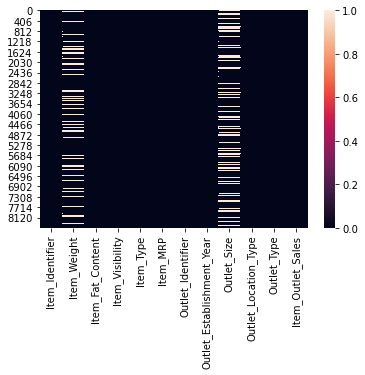

In [462]:
sns.heatmap(df.isnull())

In [463]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [464]:
d_col=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='object':
        d_col.append(x)
d_col        

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [465]:
for col in d_col:
    print(col)
    print(df[col].value_counts())
    print()

Item_Identifier
FDG33    10
FDW13    10
NCB18     9
FDW26     9
DRE49     9
         ..
FDC23     1
FDQ60     1
FDY43     1
DRF48     1
FDN52     1
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Identifier
OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
O

In [466]:
item_weight=df.pivot_table(values='Item_Weight',index='Item_Identifier')
item_weight

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [467]:
for i, item in enumerate(df['Item_Identifier']):
    if df['Item_Weight'].isnull()[i]:
        if item in item_weight:
            df['Item_Weight'][i]=item_weight.loc[item]['Item_Weight']
        else:
            df['Item_Weight'][i]=np.mean(df['Item_Weight'])

In [468]:
df['Item_Identifier'].isnull().sum()

0

In [469]:
outlet_size=df.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))
outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [470]:
df.loc[df['Outlet_Size'].isnull(),'Outlet_Size']=df.loc[df['Outlet_Size'].isnull(),'Outlet_Type'].apply(lambda x:outlet_size[x])

In [471]:
df['Outlet_Size'].isnull().sum()

0

In [472]:
df.loc[:,'Item_Visibility'].replace([0],df['Item_Visibility'].mean(),inplace=True)

In [473]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [474]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [475]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [476]:
df['Item_Identifier']=df['Item_Identifier'].apply(lambda x:x[:2])
df['Item_Identifier']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: Item_Identifier, Length: 8523, dtype: object

In [477]:
df.drop('Outlet_Establishment_Year',inplace=True,axis=1)

In [478]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cat_col=['Item_Fat_Content','Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for i in cat_col:
    df[i]=le.fit_transform(df[i])

In [479]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1,9.300,0,0.016047,4,249.8092,9,1,0,1,3735.1380
1,0,5.920,1,0.019278,14,48.2692,3,1,2,2,443.4228
2,1,17.500,0,0.016760,10,141.6180,9,1,0,1,2097.2700
3,1,19.200,1,0.066132,6,182.0950,0,2,2,0,732.3800
4,2,8.930,0,0.066132,9,53.8614,1,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,1,6.865,0,0.056783,13,214.5218,1,0,2,1,2778.3834
8519,1,8.380,1,0.046982,0,108.1570,7,2,1,1,549.2850
8520,2,10.600,0,0.035186,8,85.1224,6,2,1,1,1193.1136
8521,1,7.210,1,0.145221,13,103.1332,3,1,2,2,1845.5976


In [480]:
df.skew()

Item_Identifier         0.114510
Item_Weight             0.090561
Item_Fat_Content        0.616705
Item_Visibility         1.286877
Item_Type               0.101655
Item_MRP                0.127202
Outlet_Identifier      -0.059861
Outlet_Size            -0.861866
Outlet_Location_Type   -0.209093
Outlet_Type             0.927438
Item_Outlet_Sales       1.177531
dtype: float64

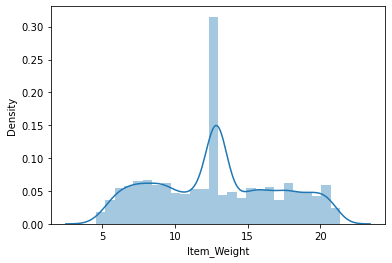

In [481]:
sns.distplot(df['Item_Weight'])
plt.show()

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Density'>

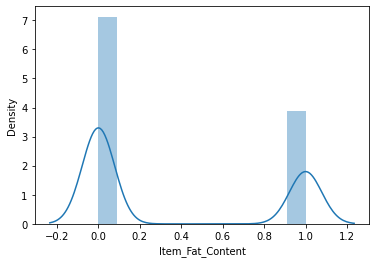

In [482]:
sns.distplot(df['Item_Fat_Content'])

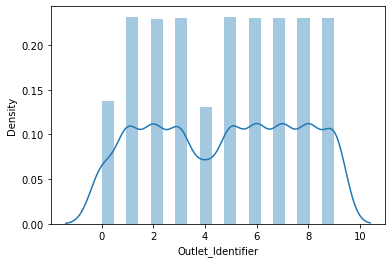

In [483]:
sns.distplot(df['Outlet_Identifier'])
plt.show()

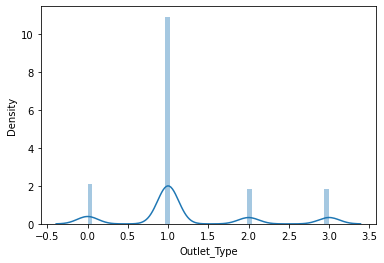

In [484]:
sns.distplot(df['Outlet_Type'])
plt.show()

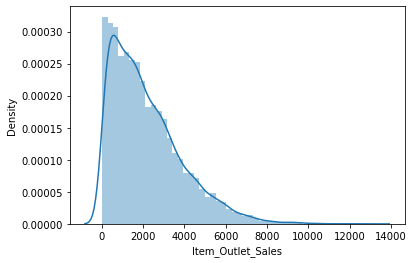

In [485]:
sns.distplot(df['Item_Outlet_Sales'])
plt.show()

In [486]:
df['Item_Outlet_Sales']=np.log(df['Item_Outlet_Sales'])

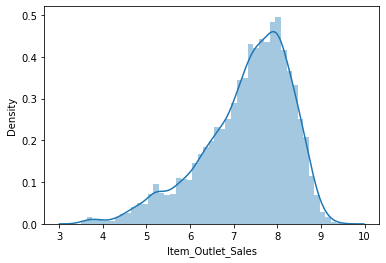

In [487]:
sns.distplot(df['Item_Outlet_Sales'])
plt.show()

In [488]:
df['Item_Visibility']=np.log(df['Item_Visibility'])

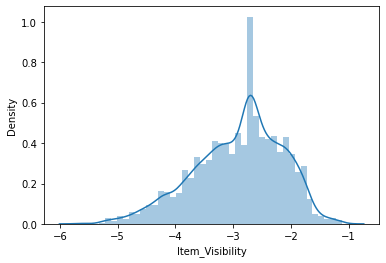

In [489]:
sns.distplot(df['Item_Visibility'])
plt.show()

In [490]:
df.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.063232,-0.166111,-0.061074,0.007456,0.032517,-0.009730,-0.001276,0.007661,0.001136,0.013851
Item_Weight,0.063232,1.000000,-0.021157,-0.016981,0.028015,0.024756,-0.007975,-0.014105,0.004088,-0.000566,0.008050
Item_Fat_Content,-0.166111,-0.021157,1.000000,0.055012,-0.139434,0.006063,0.000764,-0.001262,-0.001598,0.002199,0.012280
Item_Visibility,-0.061074,-0.016981,0.055012,1.000000,-0.046436,-0.001024,-0.081122,0.074549,-0.018167,-0.132886,-0.151969
Item_Type,0.007456,0.028015,-0.139434,-0.046436,1.000000,0.032651,0.001656,-0.000218,0.003084,0.003053,0.019908
Item_MRP,0.032517,0.024756,0.006063,-0.001024,0.032651,1.000000,0.003319,0.000872,0.000232,-0.001975,0.509671
Outlet_Identifier,-0.009730,-0.007975,0.000764,-0.081122,0.001656,0.003319,1.000000,0.260272,-0.716176,0.099873,0.262338
Outlet_Size,-0.001276,-0.014105,-0.001262,0.074549,-0.000218,0.000872,0.260272,1.000000,-0.480075,-0.401373,-0.213421
Outlet_Location_Type,0.007661,0.004088,-0.001598,-0.018167,0.003084,0.000232,-0.716176,-0.480075,1.000000,0.467219,0.058978
Outlet_Type,0.001136,-0.000566,0.002199,-0.132886,0.003053,-0.001975,0.099873,-0.401373,0.467219,1.000000,0.476759


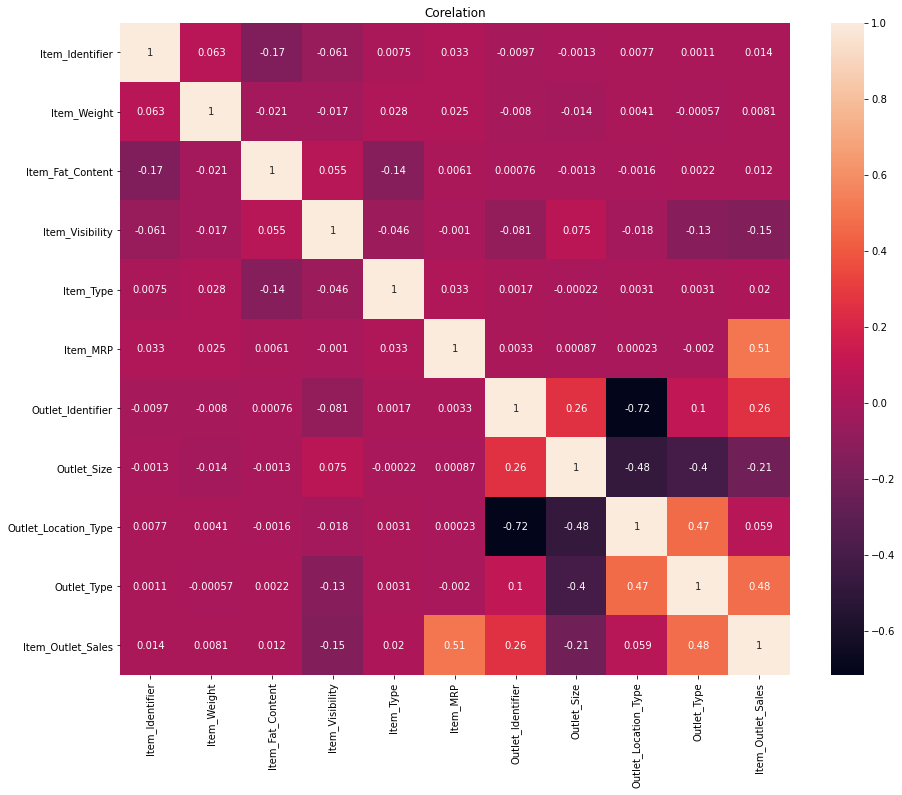

In [491]:
plt.figure(figsize=(15,12))
plt.title('Corelation')
sns.heatmap(df.corr(),annot=True)
plt.show()

Item_Identifier             AxesSubplot(0.125,0.71587;0.227941x0.16413)
Item_Weight              AxesSubplot(0.398529,0.71587;0.227941x0.16413)
Item_Fat_Content         AxesSubplot(0.672059,0.71587;0.227941x0.16413)
Item_Visibility            AxesSubplot(0.125,0.518913;0.227941x0.16413)
Item_Type               AxesSubplot(0.398529,0.518913;0.227941x0.16413)
Item_MRP                AxesSubplot(0.672059,0.518913;0.227941x0.16413)
Outlet_Identifier          AxesSubplot(0.125,0.321957;0.227941x0.16413)
Outlet_Size             AxesSubplot(0.398529,0.321957;0.227941x0.16413)
Outlet_Location_Type    AxesSubplot(0.672059,0.321957;0.227941x0.16413)
Outlet_Type                   AxesSubplot(0.125,0.125;0.227941x0.16413)
Item_Outlet_Sales          AxesSubplot(0.398529,0.125;0.227941x0.16413)
dtype: object

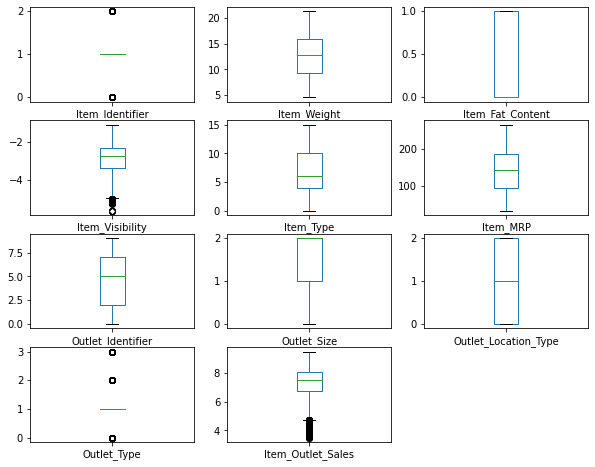

In [492]:
df.plot(kind='box',subplots=True,layout=(4,3),figsize=(10,8))

In [493]:
df.isnull().sum()

Item_Identifier         0
Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
dtype: int64

In [494]:
z=np.abs(zscore(df))
z

array([[0.17979501, 0.84187169, 0.73814723, ..., 1.36933384, 0.25265831,
        0.91342716],
       [2.09528612, 1.64170589, 1.35474328, ..., 1.09156913, 1.00297245,
        1.18186738],
       [0.17979501, 1.09855449, 0.73814723, ..., 1.36933384, 0.25265831,
        0.34595351],
       ...,
       [1.73569609, 0.53424315, 0.73814723, ..., 0.13888236, 0.25265831,
        0.20866123],
       [0.17979501, 1.33644372, 1.35474328, ..., 1.09156913, 1.00297245,
        0.22026298],
       [2.09528612, 0.45963367, 0.73814723, ..., 1.36933384, 0.25265831,
        0.64479613]])

In [495]:
threshold=3
print(np.where(z>3))

(array([ 178,  255,  273,  405,  430,  446,  489,  540,  574,  828,  906,
        920, 1041, 1311, 1913, 2055, 2180, 2324, 2337, 2374, 2394, 2571,
       3053, 3163, 3247, 3283, 3301, 3408, 3416, 3702, 3862, 3940, 4144,
       4195, 4219, 4265, 4280, 4297, 4350, 4499, 4705, 4717, 4925, 5192,
       5368, 5374, 5397, 5427, 5573, 5624, 5670, 5693, 5859, 5946, 5948,
       6139, 6644, 6658, 6847, 6869, 6871, 6881, 6950, 7388, 7464, 7551,
       7585, 7612, 7632, 7788, 7807, 7835, 7861, 8110, 8239, 8442, 8486],
      dtype=int64), array([10, 10,  3, 10, 10, 10, 10, 10, 10, 10, 10, 10,  3, 10, 10, 10,  3,
       10, 10,  3, 10, 10, 10, 10, 10, 10, 10, 10,  3, 10,  3, 10,  3,  3,
       10, 10, 10, 10, 10,  3, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10,  3, 10, 10, 10, 10, 10,  3, 10, 10,  3, 10, 10,  3,  3, 10, 10,
       10,  3, 10, 10, 10, 10, 10, 10, 10], dtype=int64))


In [496]:
df=df[(z<3).all(axis=1)]

In [497]:
df=pd.get_dummies(df,columns=['Item_Fat_Content','Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type'])


In [498]:
df

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,Item_Identifier_0,Item_Identifier_1,Item_Identifier_2,Item_Type_0,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,9.300,-4.132215,249.8092,8.225540,1,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.920,-3.948780,48.2692,6.094524,0,1,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.500,-4.088756,141.6180,7.648392,1,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.200,-2.716102,182.0950,6.596300,0,1,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0
4,8.930,-2.716102,53.8614,6.902446,1,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,-2.868511,214.5218,7.929625,1,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
8519,8.380,-3.057982,108.1570,6.308617,0,1,0,1,0,1,...,0,0,1,0,1,0,0,1,0,0
8520,10.600,-3.347099,85.1224,7.084322,1,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
8521,7.210,-1.929501,103.1332,7.520558,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0


In [499]:
y=df['Item_Outlet_Sales']
y

0       8.225540
1       6.094524
2       7.648392
3       6.596300
4       6.902446
          ...   
8518    7.929625
8519    6.308617
8520    7.084322
8521    7.520558
8522    6.640751
Name: Item_Outlet_Sales, Length: 8446, dtype: float64

In [500]:
x=df.drop('Item_Outlet_Sales',axis=1)

In [501]:
x

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_0,Item_Fat_Content_1,Item_Identifier_0,Item_Identifier_1,Item_Identifier_2,Item_Type_0,Item_Type_1,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,9.300,-4.132215,249.8092,1,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.920,-3.948780,48.2692,0,1,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.500,-4.088756,141.6180,1,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.200,-2.716102,182.0950,0,1,0,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4,8.930,-2.716102,53.8614,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,-2.868511,214.5218,1,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
8519,8.380,-3.057982,108.1570,0,1,0,1,0,1,0,...,0,0,1,0,1,0,0,1,0,0
8520,10.600,-3.347099,85.1224,1,0,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
8521,7.210,-1.929501,103.1332,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [502]:
from sklearn.model_selection import train_test_split

In [503]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=99,train_size=.80)

In [504]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import cross_val_score


In [505]:
def train(model,x,y):
    model.fit(x,y)
    pred=model.predict(x)
    cv_score=cross_val_score(model,x,y,scoring='neg_mean_squared_error',cv=5)
    cv_score=np.abs(np.mean(cv_score))
    print('Model Report')
    print('MSE:',mean_squared_error(y,pred))
    print('CV score:',cv_score)

In [506]:
model=LinearRegression()
train(model,x,y)
coef=pd.Series(model.coef_,x.columns).sort_values()

Model Report
MSE: 0.28317939811840875
CV score: 0.28529259657402484


In [507]:
model=Ridge(normalize=True)
train(model,x,y)
coef=pd.Series(model.coef_,x.columns).sort_values()

Model Report
MSE: 0.3813160371745541
CV score: 0.3827912364880724


In [508]:
model=Lasso()
train(model,x,y)
coef=pd.Series(model.coef_,x.columns).sort_values()

Model Report
MSE: 0.7189682485551472
CV score: 0.7191774360853264


In [509]:
from sklearn.tree import DecisionTreeRegressor

In [510]:
model=DecisionTreeRegressor()
train(model,x,y)
coef=pd.Series(model.feature_importances_,x.columns).sort_values()

Model Report
MSE: 0.0
CV score: 0.5803937468810688


In [511]:
from sklearn.ensemble import RandomForestRegressor

In [515]:
model=RandomForestRegressor()
train(model,x,y)
coef=pd.Series(model.feature_importances_,x.columns).sort_values()

Model Report
MSE: 0.04180077327065234
CV score: 0.3047243012234887


In [516]:
import pickle

In [517]:
filename='BigMart.pkl'
pickle.dump(Lasso,open('BigMart.pkl','wb'))